# How to understand and manipulate the periodogram of an oscillating star

## Learning Goals

By the end of this tutorial you will:

- Understand the key features of periodograms of oscillating stars.
- Understand how these features change depending on the type of star being studied.
- Be able to manipulate the periodogram to focus in on areas you're interested in.
- Be able to smooth a periodogram.
- Be able to remove features such as the convective background in solar-like oscillators.

## Introduction

The brightnesses of stars can oscillate — that is, vary over time — for many different reasons. For example, in the companion tutorials we explored light curves that oscillated due to an eclipsing binary pair transiting in front of one another, and we looked at a star that showed variability due to star spots on its surface rotating in and out of view.

In this tutorial, we will focus on *intrinsic* oscillators: stars that exhibit variability due to processes inside the stars. For example, one of these internal processes is the presence of standing waves trapped in the interior. When the light curve of a star is transformed into the frequency domain, such waves can be observed as distinct peaks in the frequency spectrum of the star. The branch of astronomy that focuses on studying these signals is called [*asteroseismology*](https://en.wikipedia.org/wiki/Asteroseismology).

Asteroseismology is an important tool because it allows intrinsic properties of a star, such as its mass and radius, to be estimated from the light curve alone. The only requirement is that the quality of the light curve — its duration, sampling, and precision — must be good enough to provide a high-resolution view of the star in the frequency domain. *Kepler* data is particularly well-suited for this purpose.

In this tutorial, we will explore two types of intrinsic oscillators that are commonly studied by asteroseismologists: 
1. [**$\delta$ Scuti stars**](https://en.wikipedia.org/wiki/Delta_Scuti_variable): a class of oscillating stars typically 1.5 to 2.5 times as massive as the Sun, which oscillate due to fluctuations in the opacity of the outer layers of the star.
2. **Solar-Like Oscillators**: a class that includes all stars that oscillate in the same manner as the Sun, namely due to turbulent motion in the convective outer layers of their atmospheres. This includes both main sequence stars as well as red giant stars.




## Imports
This tutorial only requires **[Lightkurve](https://docs.lightkurve.org)**, which in turn uses **[Matplotlib](https://matplotlib.org/)** for plotting.

In [1]:
import lightkurve as lk
%matplotlib inline

---

## 1. Exploring the Frequency Spectrum of a $\delta$ Scuti Oscillator

[$\delta$ Scuti stars](https://en.wikipedia.org/wiki/Delta_Scuti_variable) are stars roughly 1.5 to 2.5 as massive as the Sun, and oscillate due to fluctuations in the opacity of the outer layers of the star ([known as the Kappa mechanism](https://en.wikipedia.org/wiki/Kappa%E2%80%93mechanism)), alternately appearing brighter and fainter.

An example star of this type is HD 42608, which was recently observed by the *TESS* space telescope. We can search for these data using Lightkurve:

In [2]:
lk.search_lightcurve('HD 42608', mission='TESS')

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,SPOC,120,37498433,0.0
1,TESS Sector 06,2018,TESS-SPOC,1800,37498433,0.0
2,TESS Sector 06,2018,QLP,1800,37498433,0.0
3,TESS Sector 06,2018,CDIPS,1800,37498433,0.0
4,TESS Sector 33,2020,SPOC,120,37498433,0.0
5,TESS Sector 33,2020,TESS-SPOC,600,37498433,0.0
6,TESS Sector 33,2020,QLP,600,37498433,0.0


Success! A light curve for the object appears to be available in the data archive. Let's go ahead and download the data and convert it straight to a [periodogram](https://docs.lightkurve.org/reference/api/lightkurve.periodogram.Periodogram.html#lightkurve.periodogram.Periodogram) using the [to_periodogram()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.to_periodogram.html?highlight=to_periodogram) function.

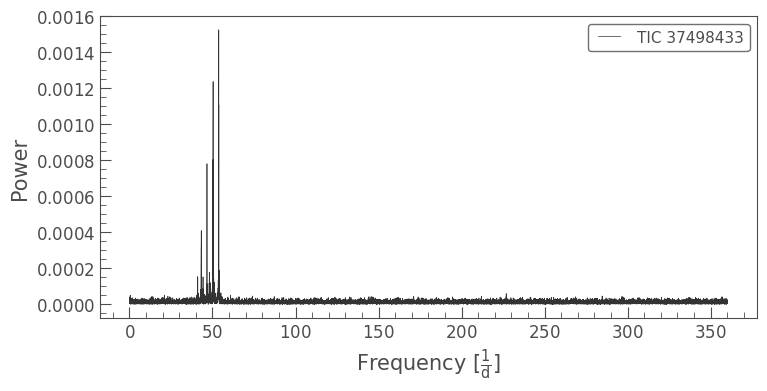

In [3]:
lc = lk.search_lightcurve('HD 42608', mission='TESS', author='SPOC', sector=6).download()
pg = lc.normalize().to_periodogram()
pg.plot();

We can see that there is a strong power excess around 50 cycles per day. These indicate stellar oscillations.

To study these peaks in more detail, we can zoom in by recreating the periodogram using the `minimum_frequency` and `maximum_frequency` keywords:

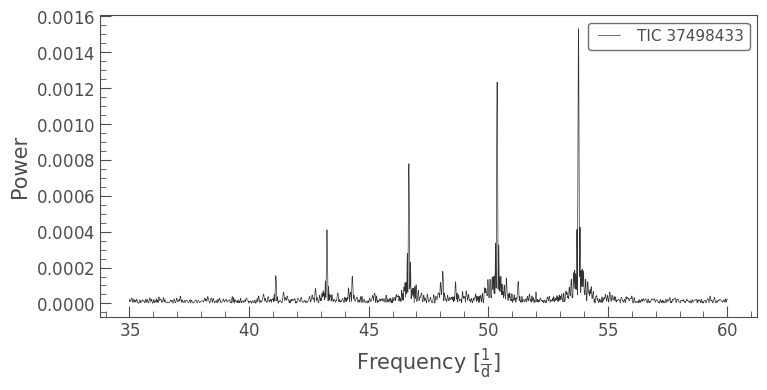

In [4]:
pg = lc.normalize().to_periodogram(minimum_frequency=35,
                                   maximum_frequency=60)
pg.plot();

This is much clearer!

Stars of this type are known to display multiple types of oscillation, including:
- **Radial Oscillations**: caused by the star shrinking and expanding radially. Also called a "breathing mode."
- **Dipole Oscillations**: caused by the star's hemispheres shrinking and expanding alternately.

Both types of oscillations are on display in the figure above. Identifying exactly what type of oscillation a given peak represents is challenging. Fortunately, this star (HD 42608) is part of a set of stars for which the oscillations have been analyzed in detail in a research paper by [Bedding et al. (2020)](https://arxiv.org/pdf/2005.06157.pdf), so you can consult that paper to learn more about the details.

Note that the modes of oscillation are very "sharp" in the figure above. This is because $\delta$ Scuti oscillations are *coherent*, which is a term astronomers in the field use for signals that have long lifetimes and are not heavily damped. Because of this, their exact oscillation frequencies can be observed in a fairly straightforward way. This sets $\delta$ Scuti stars apart from solar-like oscillators, which are damped. Let's look at an example of such a star next.

## 2. Exploring the Frequency Spectrum of a Solar-Like Oscillator


Solar-like oscillators exhibit variability driven by a different mechanism than $\delta$ Scuti stars. They encompass the class of stars that [oscillate in the same manner as the Sun](https://en.wikipedia.org/wiki/Helioseismology). Because they have lower masses than $\delta$ Scuti stars, solar-like oscillators have convective outer envelopes. The turbulent motion of these envelopes excites standing waves inside the stars which cause brightness changes on the surface. Unlike $\delta$ Scuti stars however, these waves are not coherent. Instead, these waves are stochastic and damped, which means that the lifetimes and amplitudes of the waves are limited and variable.

While the name might imply that only stars like the Sun are solar-like oscillators, this is not true. All stars with convective outer layers can exhibit solar-like oscillations, including red giant stars!

Let's have a look at the Sun-like star KIC 10963065 ([also known as Rudy](https://arxiv.org/pdf/1612.00436.pdf)), observed with *Kepler*. Because solar-like oscillation amplitudes are low, we will need to combine multiple quarters of data to improve our signal-to-noise.

We can list the available data sets as follows:

In [5]:
search_result = lk.search_lightcurve('KIC 10963065', author='Kepler', cadence="long")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr010963065,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr010963065,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr010963065,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr010963065,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr010963065,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr010963065,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr010963065,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr010963065,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr010963065,0.0


To create and plot this periodogram, we will apply a few common practices in the field:
- We will combine multiple quarters to improve the frequency resolution.
- We will [normalize](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.normalize.html?highlight=normalize) the light curve to parts per million (`ppm`).
- We will use the `psd` normalization option when calling [to_periodogram](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.to_periodogram.html?highlight=to_periodogram), which sets the units of frequency to microhertz, and normalizes the power using the spacing between bins of frequency.

We'll also plot the resulting figure in log-log space.

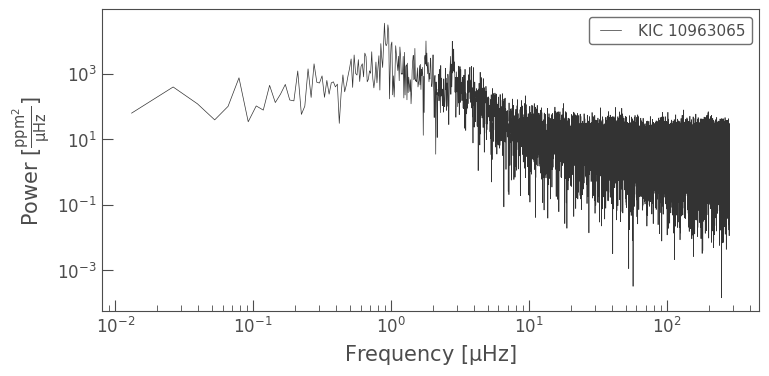

In [6]:
lc = search_result[0:10].download_all().stitch()
pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd')
#pg = lc.to_periodogram(normalization='psd')
pg.plot(scale='log');

This periodogram looks very different to that of the $\delta$ Scuti star above. There is a lot of power excess at low frequencies: this is what we call the *convective background*, which is additional noise contributed by the convective surface of the star constantly changing. We do not see any clear peaks like we did for the $\delta$ Scuti oscillator however.

There is a good reason for this: this main sequence star oscillates at frequencies too large to be seen on this periodogram, lying above the periodogram's [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_frequency).

The Nyquist frequency is a property of a time series that describes the maximum frequency that can be reliably determined in a periodogram. It stems from the assumption that you need a minimum of two observations per oscillation period to observe a pattern (one observation on the "up," and one on the "down" oscillation). It is defined as follows:

$\nu_{\rm nyq} = \frac{1}{2\Delta t}$ ,

where $\Delta t$ is the observing cadence.

The reason that we can't see Rudy's oscillations in the periodogram above is because we constructed this periodogram using the *Kepler* 30-minute Long Cadence data. Solar-like oscillators on the main sequence typically oscillate on the order of minutes (five minutes for the Sun), at frequencies much higher than will be visible on this periodogram. To see Rudy's oscillations, we will need to use the *Kepler* Short Cadence (SC) observations, which used a time sampling of one minute.  We can obtain these data as follows:

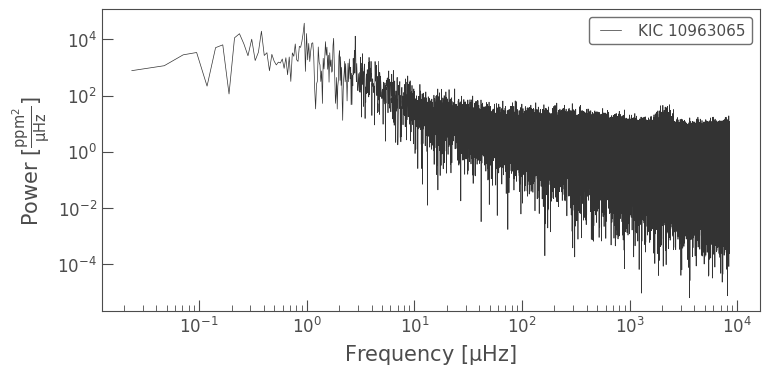

In [7]:
search_result = lk.search_lightcurve('KIC 10963065',
                                     mission='Kepler',
                                     cadence='short')
lc = search_result[0:10].download_all().stitch()
pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd')
pg.plot(scale='log');

Now we can see a power excess near $2000\, \mu\rm{Hz}$. This frequency is almost 10 times higher than we could view using the Long Cadence data alone. Let's zoom in on this region so we can look at the signals in more detail, like we did for the $\delta$ Scuti star.

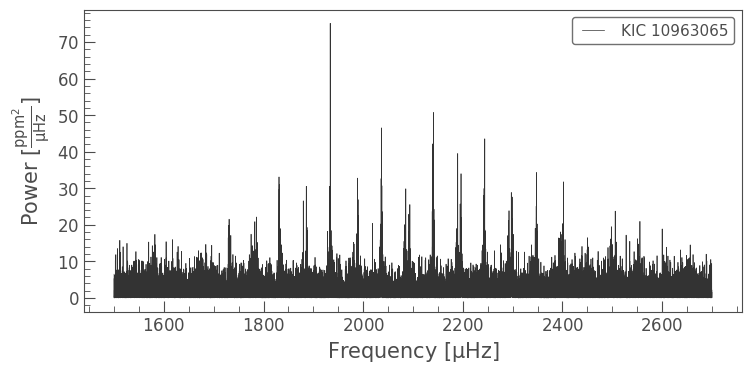

In [8]:
zoom_pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd',
                                                  minimum_frequency=1500,
                                                  maximum_frequency=2700)
zoom_pg.plot();

Compared to the $\delta$ Scuti, the modes of oscillation in the figure above are less sharp, even though we used much more data to create the periodogram. This is because the modes in solar-like oscillators are damped due to the turbulent motion of the convective envelope. This lowers their amplitudes and also causes the lifetimes of the oscillations to be short. The short lifetimes create some uncertainty around the exact oscillation frequency, and so the peaks that appear in the periodogram are a little broader (usually Lorentzian-like in shape). This may not be immediately apparant from these figures, but is much clearer if you zoom in on an individual mode.

## 3. How to Smooth and Detrend a Periodogram

### 3.1. The box kernel filter

To further explore the oscillation modes, we will demonstrate some of Lightkurve's smoothing tools. There are two types of smoothing functions we can call through the [smooth()](https://docs.lightkurve.org/reference/api/lightkurve.periodogram.Periodogram.smooth.html?highlight=smooth) function. Let's start with a basic "moving median," also known as a 1D box kernel.

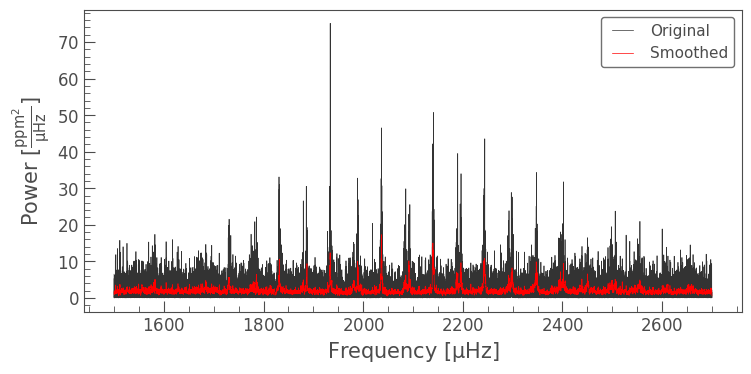

In [9]:
smooth_pg = zoom_pg.smooth(method='boxkernel', filter_width=0.5)
ax = zoom_pg.plot(label='Original')
smooth_pg.plot(ax=ax, color='red', label='Smoothed');

In the figure above, the smoothed periodogram is plotted over the top of the original periodogram. In this case we have used the [Astropy `Box1DKernel`](https://docs.astropy.org/en/stable/api/astropy.convolution.Box1DKernel.html) filter, with a filter width of $0.5\, \mu \rm{Hz}$. The filter takes the median value of power in a region $0.5\, \mu \rm{Hz}$ around a data point, and replaces that point with the median value. It then moves on to the next data point. This creates a smoothed periodogram of the same length as the original. Because the power values are now correlated, these smoothed periodograms usually aren't used for computational analysis, but they can aid visual explorations of the location of the oscillation modes.

### 3.2. The log median filter

While the [`Box1DKernel`](https://docs.astropy.org/en/stable/api/astropy.convolution.Box1DKernel.html) filter can be used to help identify modes of oscillation in the presence of noise, it is mostly good for smoothing on small scales. For large scales, we can instead use Lightkurve's log median filter.

As we saw above, solar-like oscillators exhibit a large power excess at low frequencies due to the turbulent convection visible near the stellar surface. When studying modes of oscillation, we typically aren't interested in the convective background, and prefer to remove it.

The log median filter performs a similar operation to the  [`Box1DKernel`](https://docs.astropy.org/en/stable/api/astropy.convolution.Box1DKernel.html)  filter, but does so in log space. This means that at low frequencies the number of frequency bins of which the median is taken is small, and that at high frequencies many frequency bins are included in the median calculation. As a result, the log median filter smooths over the convection background but ignores the modes of oscillation at high frequencies.

The result of applying a log median filter is demonstrated using the red line in the figure below:

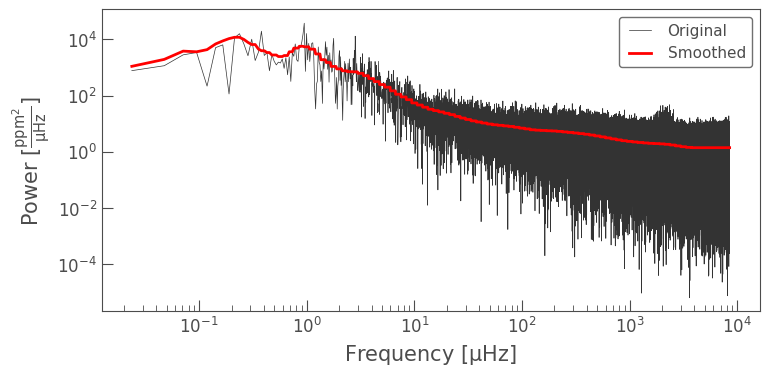

In [10]:
smooth_pg = pg.smooth(method='logmedian', filter_width=0.1)
ax = pg.plot(label='Original')
smooth_pg.plot(ax=ax, linewidth=2,  color='red', label='Smoothed', scale='log');

### 3.3. Flattening

When studying modes of oscillation, it is typically preferred to remove the convective background. In a detailed analysis this would involve fitting a model to the background. As can be seen in the figure above, however, Lightkurve's log median [smooth()](https://docs.lightkurve.org/reference/api/lightkurve.periodogram.Periodogram.smooth.html?highlight=smooth) method provides a useful first-order approximation of the background without the need for a model.

To divide the power spectrum by the background, we can use Lightkurve's [flatten()](https://docs.lightkurve.org/reference/api/lightkurve.periodogram.Periodogram.flatten.html?highlight=flatten#lightkurve.periodogram.Periodogram.flatten) method. This function uses the log median smoothing method to determine the background, and returns a new [periodogram](https://docs.lightkurve.org/reference/api/lightkurve.periodogram.Periodogram.html?highlight=periodogra#lightkurve.periodogram.Periodogram) object in which the background has been divided out.

In [11]:
snrpg = pg.flatten()
snrpg

SNRPeriodogram(ID: KIC 10963065)

The periodogram obtained by dividing by the noise in this way is commonly called a Signal-to-Noise periodogram (`SNRPeriodogram`), because the noise, in the form of the convective background, has been removed. This is a little bit of a misnomer, because there is still noise present in the periodogram.

We plot the `SNRPeriodogram` below, and see that the modes of oscillation stick out from the noise much more clearly now that the convective background has been removed.

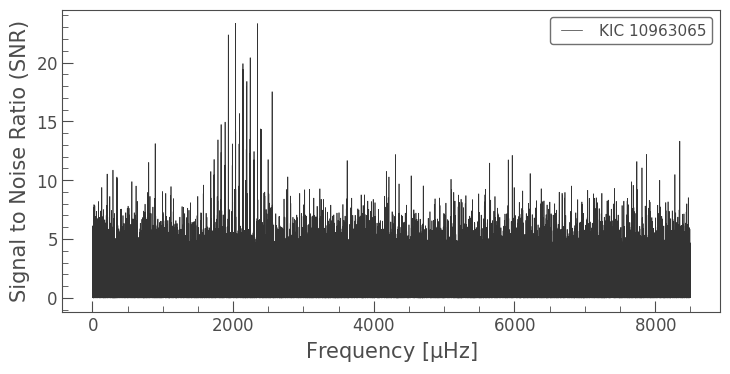

In [12]:
snrpg.plot();

## 4. Closing Comments

In this tutorial, we explored two common types of oscillating stars, and demonstrated how Lightkurve can be used to study their power specta. In the accompanying tutorials, you can learn how to use these tools to extract more detailed information from them, including the radius and mass of a star!

For further reading on $\delta$ Scuti stars, solar-like oscillators, and Fourier Transforms, we recommend you consult the following papers:

- [Vanderplas (2017)](https://arxiv.org/pdf/1703.09824.pdf) – A detailed paper on Fourier Transforms and Lomb-Scargle Periodograms.
- [Bedding et al. (2020)](https://arxiv.org/pdf/2005.06157.pdf) – A demonstration of mode identification in $\delta$ Scuti stars.
- [Chaplin & Miglio (2013)](https://arxiv.org/pdf/1303.1957.pdf) – A review paper on asteroseismology of solar-like oscillators with *Kepler*.
- [Aerts (2019)](https://arxiv.org/pdf/1912.12300.pdf) – A comprehensive review that covers asteroseismology of a wide range of oscillating stars, including solar-like oscillators and $\delta$ Scutis.


## About this Notebook

**Authors**: Oliver Hall (oliver.hall@esa.int), Geert Barentsen

**Updated On**: 2020-09-29

## Citing Lightkurve and Astropy

If you use `lightkurve` or `astropy` for published research, please cite the authors. Click the buttons below to copy BibTeX entries to your clipboard.

In [13]:
lk.show_citation_instructions()

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>
